In [40]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [41]:
df_GDP_emp = pd.read_csv('statistics_CBS/Bbp__kwartalen__mutaties_04052022_121623.csv', delimiter=';')
df_GDP_emp.head()

,Soort mutaties,Perioden,Opbouw bbp vanuit de finale bestedingen/Beschikbaar voor finale bestedingen/Bruto binnenlands product (%)
0,"Volume, t.o.v. voorgaande periode",1996 3e kwartaal,1.4
1,"Volume, t.o.v. voorgaande periode",1996 4e kwartaal,0.7
2,"Volume, t.o.v. voorgaande periode",1997 1e kwartaal,1.1
3,"Volume, t.o.v. voorgaande periode",1997 2e kwartaal,1.0
4,"Volume, t.o.v. voorgaande periode",1997 3e kwartaal,1.5


In [48]:
df_GDP_sim = pd.read_csv('../results/result_data/first.csv')
GDP_sim = 100 * df_GDP_sim['GDP'].to_numpy() / df_GDP_sim['CPI'].to_numpy()

In [45]:
gr_emp = df_GDP_emp['Opbouw bbp vanuit de finale bestedingen/Beschikbaar voor finale bestedingen/Bruto binnenlands product (%)'].to_numpy()

In [50]:
gr_sim = 100 * (GDP_sim[3:] - GDP_sim[:-3]) / GDP_sim[:-3]

In [51]:
# generate CDF
emp_CDF = sm.distributions.ECDF(gr_emp)
sim_CDF = sm.distributions.ECDF(gr_sim)

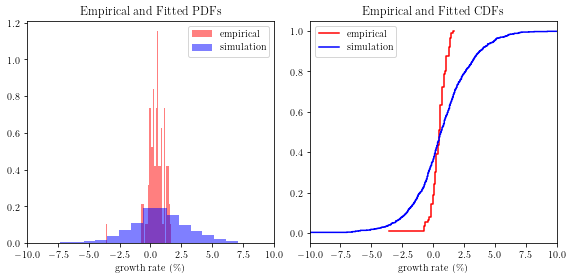

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax[0].hist(gr_emp, bins=50, density=True, label='empirical', color='red', alpha=0.5)
ax[0].hist(gr_sim, bins=50, density=True, label='simulation', color='blue', alpha=0.5)
ax[0].set_xlabel('growth rate (\%)')
ax[0].set_title('Empirical and Fitted PDFs')
ax[0].set_xlim(-10, 10)
ax[0].legend()

x_emp = np.linspace(min(gr_emp), max(gr_emp), len(gr_emp))
x_sim = np.linspace(min(gr_sim), max(gr_sim), len(gr_sim))
y_emp = emp_CDF(x_emp)
y_sim = sim_CDF(x_sim)
ax[1].step(x_emp, y_emp, label='empirical', color='red')
ax[1].step(x_sim, y_sim, label='simulation', color='blue')
ax[1].set_xlabel('growth rate (\%)')
ax[1].set_title('Empirical and Fitted CDFs')
ax[1].set_xlim(-10, 10)
ax[1].legend()

# plt.suptitle('Quarterly growth rates in NL (1996Q2-2018Q4)')
plt.tight_layout()
plt.show()

In [71]:
# Perform 2-sample KS test
KS_test = stats.ks_2samp(gr_sim, gr_emp)
print(KS_test)

KstestResult(statistic=0.33895162414610347, pvalue=8.872031442841433e-09)
